# WeatherPy
---------

In [1]:
%load_ext lab_black
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
import datetime
from scipy.stats import linregress

# Import citipy to determine city
from citipy import citipy

# import API key
from api_keys import weather_api_key

In [2]:
# Generate cities list
cities = []
lat_lngs = []

# Create set of random lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for the lat, lng
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # add unique cities
    if city not in cities:
        cities.append(city)

len(cities)

591

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls

In [3]:
# Create lists for the weather findings of each city
city_name = []
country = []
date = []
lat_list = []
lng_list = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
i = 1


print("Beginning Data Retrival")
print("-" * 30)

for city in cities:

    r = requests.get(
        "http://api.openweathermap.org/data/2.5/weather?",
        params={"units": "imperial", "appid": weather_api_key, "q": city,},
    ).json()

    try:
        city_name.append(r["name"])
        country.append(r["sys"]["country"])
        date.append(r["dt"])
        lat_list.append(r["coord"]["lat"])
        lng_list.append(r["coord"]["lon"])
        max_temp.append(r["main"]["temp_max"])
        cloudiness.append(r["clouds"]["all"])
        humidity.append(r["main"]["humidity"])
        wind_speed.append(r["wind"]["speed"])

        print(f"Processing Record {i}|{city}")
        i += 1

    except (KeyError, IndexError):
        print("City not found")

print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)

Beginning Data Retrival
------------------------------
Processing Record 1|livingston
Processing Record 2|castro
Processing Record 3|ilulissat
Processing Record 4|butaritari
Processing Record 5|tuatapere
Processing Record 6|busselton
Processing Record 7|punta arenas
Processing Record 8|pochutla
Processing Record 9|saskylakh
Processing Record 10|bakal
Processing Record 11|hobyo
Processing Record 12|bluff
Processing Record 13|puerto ayora
Processing Record 14|ikare
City not found
Processing Record 15|chodavaram
Processing Record 16|yellowknife
City not found
Processing Record 17|khandbari
Processing Record 18|udachnyy
City not found
Processing Record 19|talnakh
Processing Record 20|grand gaube
Processing Record 21|hobart
Processing Record 22|umm bab
Processing Record 23|pevek
City not found
Processing Record 24|saint-philippe
Processing Record 25|taoudenni
Processing Record 26|lewistown
Processing Record 27|lampazos de naranjo
Processing Record 28|praia da vitoria
Processing Record 29|ri

# Convert Raw Data to a DataFrame
* Export the city data into a csv file

In [4]:
# Create data frame
city_df = pd.DataFrame(
    {
        "City": city_name,
        "Country": country,
        "Date": date,
        "Max Temp": max_temp,
        "Clouds": cloudiness,
        "Humidity": humidity,
        "Wind Speed": wind_speed,
        "Lat": lat_list,
        "Lng": lng_list,
    }
)

city_df = city_df.rename_axis("City ID")
city_df.head()

,City,Country,Date,Max Temp,Clouds,Humidity,Wind Speed,Lat,Lng
City ID,,,,,,,,,
0,Livingston,GB,1608576268,42.01,90,100,2.24,55.90,-3.52
1,Castro,BR,1608576059,76.24,67,84,7.09,-24.79,-50.01
2,Ilulissat,GL,1608576269,21.20,20,53,13.87,69.22,-51.10
3,Butaritari,KI,1608576269,80.11,100,81,10.74,3.07,172.79
4,Tuatapere,NZ,1608576269,55.00,100,96,1.99,-46.13,167.68


In [6]:
# Write out to CSV file
city_df.to_csv("images/city_list.csv")
city_df

,City,Country,Date,Max Temp,Clouds,Humidity,Wind Speed,Lat,Lng
City ID,,,,,,,,,
0,Livingston,GB,1608576268,42.01,90,100,2.24,55.90,-3.52
1,Castro,BR,1608576059,76.24,67,84,7.09,-24.79,-50.01
2,Ilulissat,GL,1608576269,21.20,20,53,13.87,69.22,-51.10
3,Butaritari,KI,1608576269,80.11,100,81,10.74,3.07,172.79
4,Tuatapere,NZ,1608576269,55.00,100,96,1.99,-46.13,167.68
...,...,...,...,...,...,...,...,...,...
541,Gojō,JP,1608576362,46.40,86,61,12.75,34.35,135.70
542,Bucerías,MX,1608576363,77.00,75,65,5.64,20.75,-105.33
543,Belogorsk,RU,1608576363,3.34,100,94,4.59,50.92,128.46


# Inspect the data and remove cities where humidity > 100%

In [7]:
humid_city = city_df.loc[city_df["Humidity"] > 100]
humid_city.count()

City          0
Country       0
Date          0
Max Temp      0
Clouds        0
Humidity      0
Wind Speed    0
Lat           0
Lng           0
dtype: int64

In [8]:
# Get the indices of cities that have humidity over 100
print(humid_city)
index_list = city_df[(city_df["Humidity"] > 100)].index
index_list

# There are no cities in my list that have a humidity over 100

Empty DataFrame
Columns: [City, Country, Date, Max Temp, Clouds, Humidity, Wind Speed, Lat, Lng]
Index: []


Int64Index([], dtype='int64', name='City ID')

In [9]:
# Create a clean city data file by dropping the index from above
# (this did not drop anything since there is no humid city >100)
clean_city_data = city_df.drop(index_list, inplace=False)
clean_city_data

,City,Country,Date,Max Temp,Clouds,Humidity,Wind Speed,Lat,Lng
City ID,,,,,,,,,
0,Livingston,GB,1608576268,42.01,90,100,2.24,55.90,-3.52
1,Castro,BR,1608576059,76.24,67,84,7.09,-24.79,-50.01
2,Ilulissat,GL,1608576269,21.20,20,53,13.87,69.22,-51.10
3,Butaritari,KI,1608576269,80.11,100,81,10.74,3.07,172.79
4,Tuatapere,NZ,1608576269,55.00,100,96,1.99,-46.13,167.68
...,...,...,...,...,...,...,...,...,...
541,Gojō,JP,1608576362,46.40,86,61,12.75,34.35,135.70
542,Bucerías,MX,1608576363,77.00,75,65,5.64,20.75,-105.33
543,Belogorsk,RU,1608576363,3.34,100,94,4.59,50.92,128.46


# Plotting the Data

In [10]:
city_df["Date"]

City ID
0      1608576268
1      1608576059
2      1608576269
3      1608576269
4      1608576269
          ...    
541    1608576362
542    1608576363
543    1608576363
544    1608576318
545    1608576363
Name: Date, Length: 546, dtype: int64

In [11]:
# format the date
city_date = datetime.datetime.fromtimestamp(int(city_df["Date"][0])).strftime(
    "%Y-%m-%d"
)
city_date

'2020-12-21'

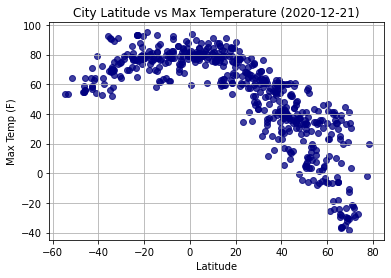

In [12]:
# Graph the latitude vs the max temp
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", color="navy", alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"City Latitude vs Max Temperature ({city_date})")
plt.savefig("images/Latitude_vs_Max_Temp_scatter.png")
plt.show()

##### This plot is showing the max temp from the south pole to the north pole. This data shows cities closer to the poles have a lower max temp than those cities closer the equater (0).

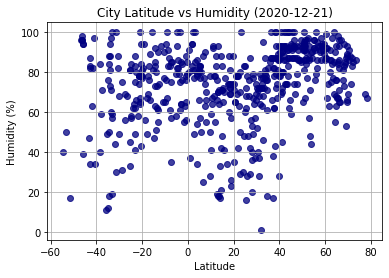

In [13]:
# Graph the latitude vs the humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", color="navy", alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({city_date})")
plt.savefig("images/Latitude_vs_Humidity_scatter.png")
plt.show()

##### This plot is showing the humidity from the south pole to the north pole. Most of the cities in this plot have a high percentage of humidity.

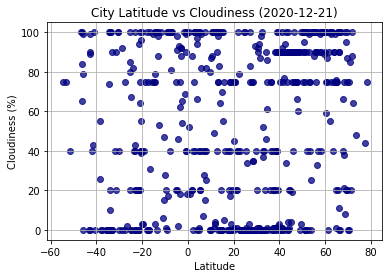

In [14]:
# Graph the latitude vs the cloudiness
plt.scatter(city_df["Lat"], city_df["Clouds"], marker="o", color="navy", alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({city_date})")
plt.savefig("images/Latitude_vs_Cloudiness_scatter.png")
plt.show()

##### This plot is showing the cloudiness of cities from the south pole to the north pole. I do not see a trend in the cloudiness of cities. It does look like a large amount of cities have 0% cloudiness and a large amount have 100% cloudiness.

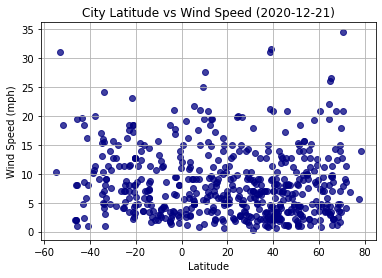

In [15]:
# Graph the latitude vs the wind speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", color="navy", alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({city_date})")
plt.savefig("images/Latitude_vs_Wind_Speed_scatter.png")
plt.show()

##### This plot shows the wind speed of cities from the south to north pole. A majority of the cities have a low wind speed, there are some outliers on either hemisphere that have a higher wind speed >20 mph.

# Linear Regression

In [16]:
# create linear regression function
def linear_regression(x_value, y_value):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, "r-")
    return [eq, rvalue]


def annotate(eq, a, b):
    plt.annotate(eq, (a, b), fontsize=10, color="red")

In [17]:
# northern and southern hemisphere dataframes
north = city_df.loc[city_df["Lat"] >= 0]
north_df = pd.DataFrame(north)

south = city_df.loc[city_df["Lat"] < 0]
south_df = pd.DataFrame(south)

### Northern Hemisphere - Max Temp vs Latitude Linear Regression

The r-squared is: 0.7221688955990128


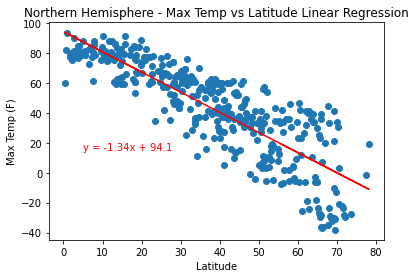

In [18]:
equation = linear_regression(north_df["Lat"], north_df["Max Temp"])

annotate(equation[0], 5, 15)

plt.title(f"Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Northern_Hemisphere-Max_Temp_vs_Lat")

##### This plot shows the max temp of cities in the northern hemisphere. The linear regression is modeling a relationship that temperatures decrease the further away the city is from the equator.

### Southern Hemisphere - Max Temp vs Latitude Linear Regression

The r-squared is: 0.268016881928747


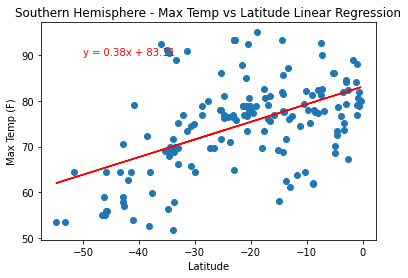

In [19]:
equation = linear_regression(south_df["Lat"], south_df["Max Temp"])

annotate(equation[0], -50, 90)

plt.title(f"Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Southern_Hemisphere-Max_Temp_vs_Lat")

##### This plot shows the max temp of cities in the southern hemisphere. The linear regression is modeling a relationship that temperatures increase the closer the city is to the equator.

### Northern Hemisphere - Humidity vs Latitude Linear Regression 

The r-squared is: 0.13087474042567934


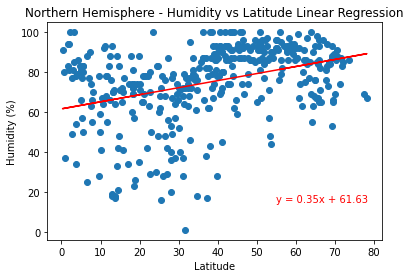

In [20]:
equation = linear_regression(north_df["Lat"], north_df["Humidity"])

annotate(equation[0], 55, 15)

plt.title(f"Northern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Northern_Hemisphere-Humidity_vs_Lat")

##### This plot shows the humidity of cities in the northern hemisphere. The linear regression is modeling a relationship that humidity slowly increase the further the city is from the equator. However, the linear regression is not a good depiction of the data as there are a lot of cities that are far away from the regression line.

### Southern Hemisphere - Humidity vs Latitude Linear Regression 

The r-squared is: 0.04608787011726245


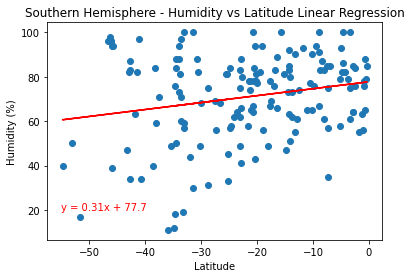

In [21]:
equation = linear_regression(south_df["Lat"], south_df["Humidity"])

annotate(equation[0], -55, 20)

plt.title(f"Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Southern_Hemisphere-Humidity_vs_Lat")

##### This plot shows the humidity of cities in the southern hemisphere. The linear regression is modeling a relationship that humidity slowly increase the closer the city is to the equator. However, the linear regression is not a good depiction of the data as there are a lot of cities that are far away from the regression line.

###  Northern Hemisphere - Cloudiness vs Latitude Linear Regression

The r-squared is: 0.057653578561208056


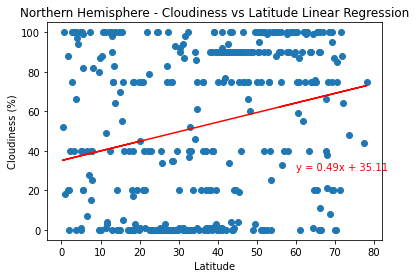

In [22]:
equation = linear_regression(north_df["Lat"], north_df["Clouds"])

annotate(equation[0], 60, 30)

plt.title(f"Northern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Northern_Hemisphere-Cloudiness_vs_Lat")

##### This plot shows the cloudiness of cities in the northern hemisphere. The linear regression line shows no relationship in the data.

### Southern Hemisphere - Cloudiness vs Latitude Linear Regression

The r-squared is: 0.028576265175307675


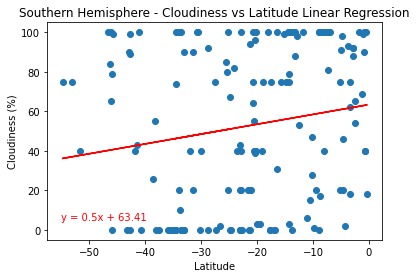

In [23]:
equation = linear_regression(south_df["Lat"], south_df["Clouds"])

annotate(equation[0], -55, 5)

plt.title(f"Southern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Southern_Hemisphere-Cloudiness_vs_Lat")

##### This plot shows the cloudiness of cities in the southern hemisphere. The linear regression line shows no relationship in the data. There is a slight decrease in the regression but the data points are no where near the line so a linear regression is not a good model to show a relationship

###  Northern Hemisphere - Wind Speed vs Latitude Linear Regression

The r-squared is: 0.0002553652429038769


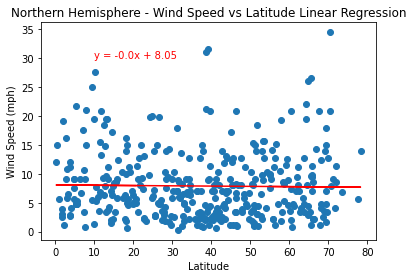

In [24]:
equation = linear_regression(north_df["Lat"], north_df["Wind Speed"])

annotate(equation[0], 10, 30)

plt.title(f"Northern Hemisphere - Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Northern_Hemisphere-Wind_Speed_vs_Lat")

##### This plot shows the cloudiness of cities in the northern hemisphere. The linear regression line shows an increase in cloudiness the further away a city is from the equator but the line is also not a good representation of the data as there are many outliers.

###  Southern Hemisphere - Wind Speed vs Latitude Linear Regression

The r-squared is: 0.049113006930517095


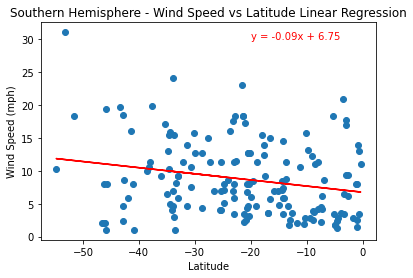

In [25]:
equation = linear_regression(south_df["Lat"], south_df["Wind Speed"])

annotate(equation[0], -20, 30)

plt.title(f"Southern Hemisphere - Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {equation[1]**2}")
plt.savefig("images/Southern_Hemisphere-Wind_Speed_vs_Lat")

##### This plot shows the cloudiness of cities in the southern hemisphere. The linear regression line shows an decrease in cloudiness the closer a city is to the equator but the line is also not a good representation of the data as there are many outliers.